# Outlier detection with UMAP

<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/ml_in_ms_wt24/blob/main/wt_25_ml_in_ms/04_ex/2d_umap_projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->


From https://umap-learn.readthedocs.io/en/latest/basic_usage.html

**UMAP**  
UMAP is a general purpose manifold learning and dimension reduction algorithm. It is designed to be compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines. If you are already familiar with sklearn you should be able to use UMAP as a drop in replacement for t-SNE and other dimension reduction classes. If you are not so familiar with sklearn this tutorial will step you through the basics of using UMAP to transform and visualise data.






In [31]:
# on Coder run pdm install
# on Colab, you might need to run pip install umap-learn[plot]
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
import umap.plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Today we work with penguins  

<img src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/man/figures/lter_penguins.png" alt="drawing" width="500"/>  


<img src="https://github.com/allisonhorst/palmerpenguins/blob/c19a904462482430170bfe2c718775ddb7dbb885/man/figures/culmen_depth.png?raw=true" alt="drawing" width="500"/>  

In [32]:
# Load data

df_penguins = pd.read_csv(
    "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv"
)
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [33]:
# Clean data

# Drop nan columns
df_penguins = df_penguins.dropna()
# stats
df_penguins.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

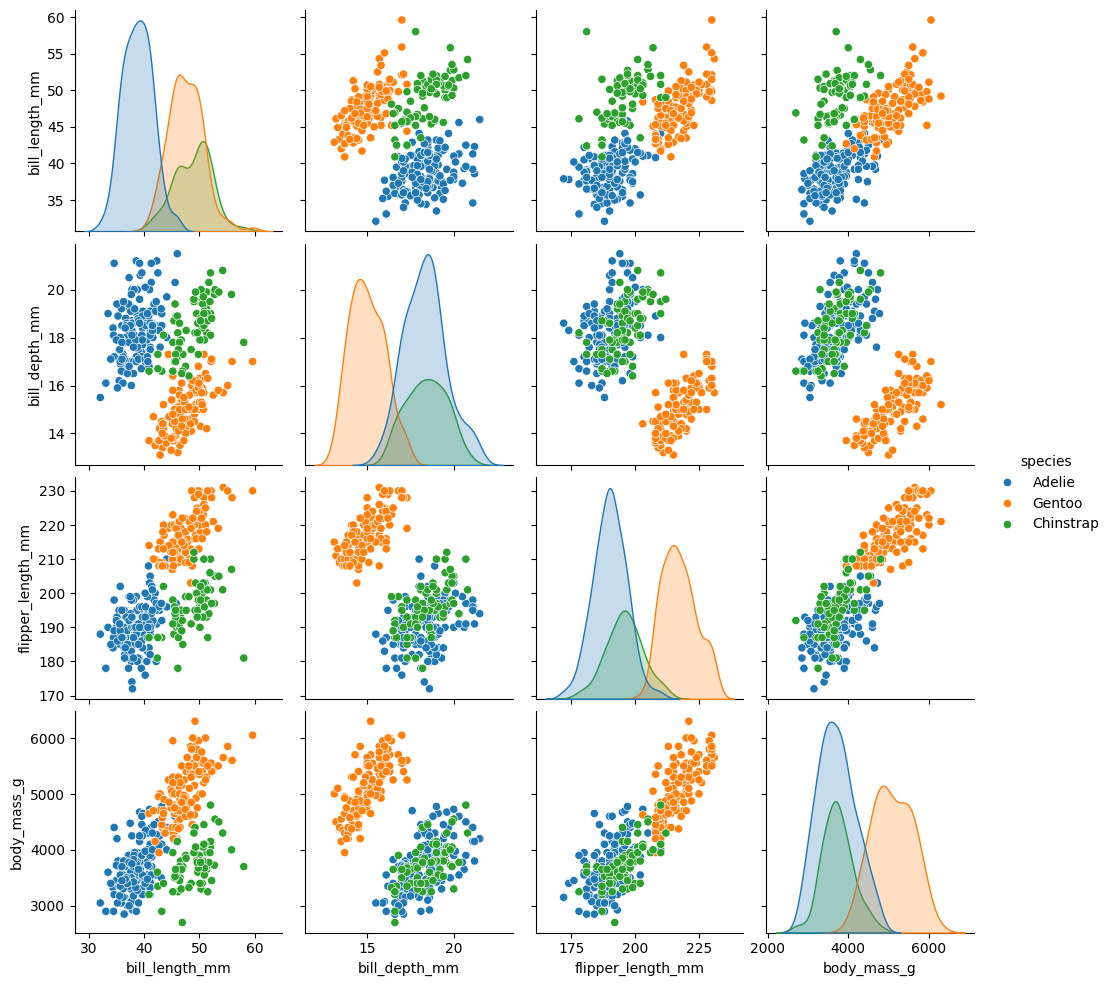

In [34]:
# Plot
# Seaborn plots you all correlations and histograms for a dataset
sns.pairplot(df_penguins.drop("year", axis=1), hue="species")

In [35]:
rows = [
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
]
penguin_data = df_penguins[rows]


scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
display(df_penguins)
df_scaled_penguin_data = df_penguins.copy()
df_scaled_penguin_data[rows] = scaled_penguin_data
df_scaled_penguin_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,male,2007
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,female,2007
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,female,2007
4,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,female,2007
5,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,2.162314,1.340165,0.431094,-0.257532,male,2009
340,Chinstrap,Dream,-0.090248,0.475587,0.073816,-1.003795,female,2009
341,Chinstrap,Dream,1.026876,0.526444,-0.569284,-0.537380,male,2009
342,Chinstrap,Dream,1.246638,0.933305,0.645461,-0.133155,male,2009


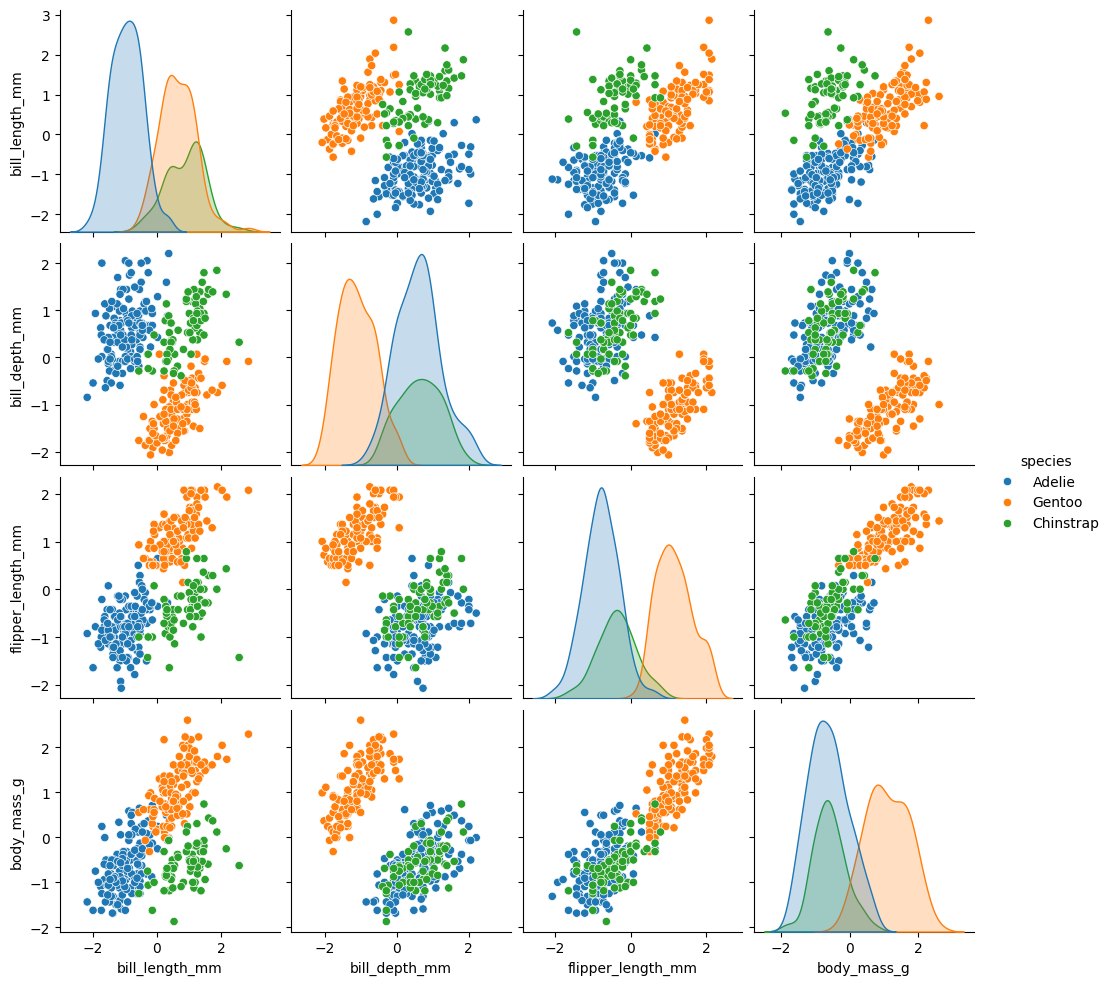

In [36]:
sns.pairplot(df_scaled_penguin_data.drop("year", axis=1), hue="species")

In [37]:
# Init UMAP, see parameters
reducer = umap.UMAP()

In [38]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

(333, 2)

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

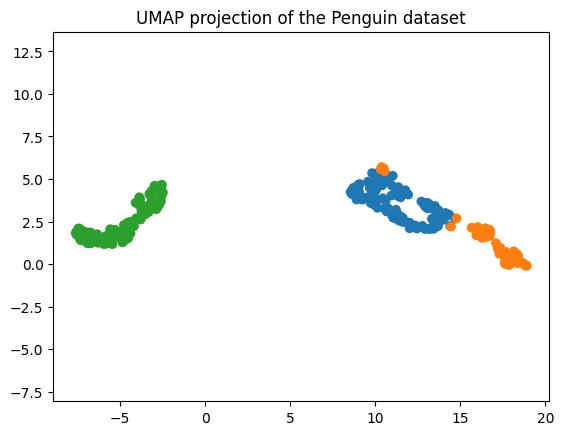

In [39]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[
        sns.color_palette()[x]
        for x in df_penguins.species.map({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})
    ],
)
plt.gca().set_aspect("equal", "datalim")
plt.title("UMAP projection of the Penguin dataset")

- Interpret the results?
- What is the meaning of the three different clusters?

# Tutorial
1. Load the Polymer dataset from https://raw.githubusercontent.com/kuennethgroup/ml_in_ms_wt24/refs/heads/main/data/polymers_tend_to_crystalize.json using pandas
2. Standard scale the fingerprints
3. Reduce the scaled fingerprints to 2 dimensions using UMAP 
4. Plot the results 
5. Interpret the results